In [16]:
from itertools import chain

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate
sns.set_style('darkgrid')

import os
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate

from tensorflow.keras.models import load_model
import util

In [17]:
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']

In [18]:
freq_pos=np.array([0.02406894, 0.0212051,  0.1201283,  0.00201105, 0.04108648, 0.05422193,
 0.17651401, 0.01266451, 0.04798513, 0.05641117, 0.03028027, 0.01471374,
 0.10424357, 0.02074689])
freq_neg=np.array([0.97593106, 0.9787949,  0.8798717,  0.99798895, 0.95891352, 0.94577807,
 0.82348599, 0.98733549, 0.95201487, 0.94358883, 0.96971973, 0.98528626,
 0.89575643, 0.97925311])

pos_weights = freq_neg
neg_weights = freq_pos

In [20]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (Float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0
        
        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            loss += loss_pos + loss_neg
        
        return loss
    
        ### END CODE HERE ###
    return weighted_loss

In [21]:
base_model = DenseNet121(weights='imagenet_weights_no_top.h5', include_top = False)

x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights),metrics=['accuracy'])

In [22]:
model.load_weights("xray_class_weights.best.hdf5")

In [23]:
df = pd.read_csv("train-small.csv")
IMAGE_DIR = "images/"

Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Effusion
Generating gradcam for class Hernia
Loading original image
Generating gradcam for class Infiltration
Generating gradcam for class Mass
Generating gradcam for class Nodule
Generating gradcam for class Atelectasis
Loading original image
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Fibrosis
Loading original image
Generating gradcam for class Edema
Generating gradcam for class Consolidation


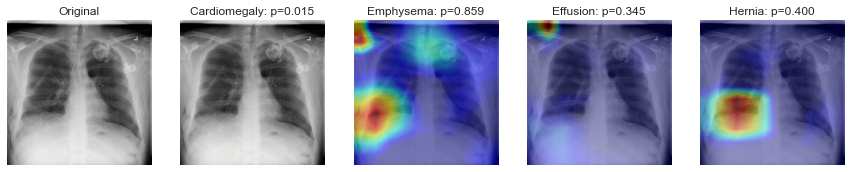

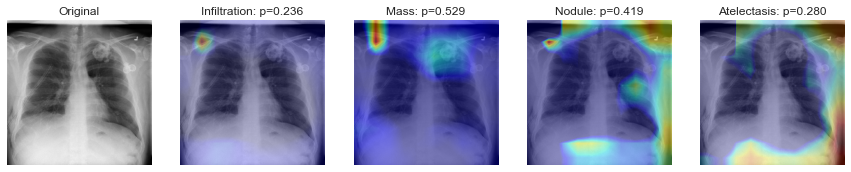

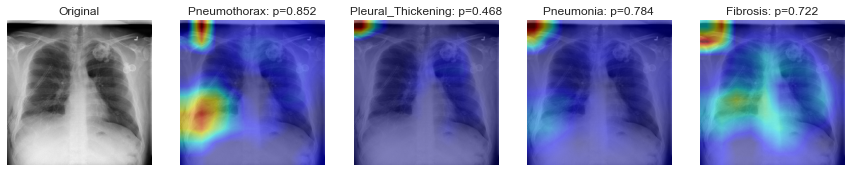

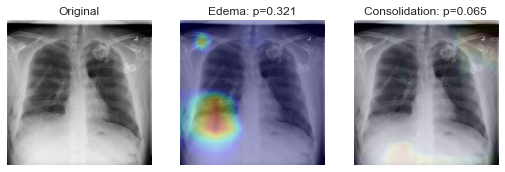

In [11]:
#Emphysema and Pneumothorax
labels_to_show = labels[:4]
util.compute_gradcam(model, '00011355_002.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[4:8]
util.compute_gradcam(model, '00011355_002.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[8:12]
util.compute_gradcam(model, '00011355_002.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[12:]
util.compute_gradcam(model, '00011355_002.png', IMAGE_DIR, df, labels, labels_to_show)

Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Effusion
Generating gradcam for class Hernia
Loading original image
Generating gradcam for class Infiltration
Generating gradcam for class Mass
Generating gradcam for class Nodule
Generating gradcam for class Atelectasis
Loading original image
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Fibrosis
Loading original image
Generating gradcam for class Edema
Generating gradcam for class Consolidation


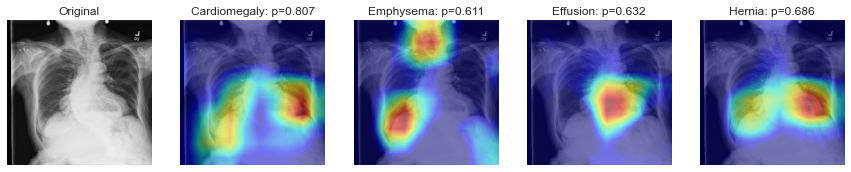

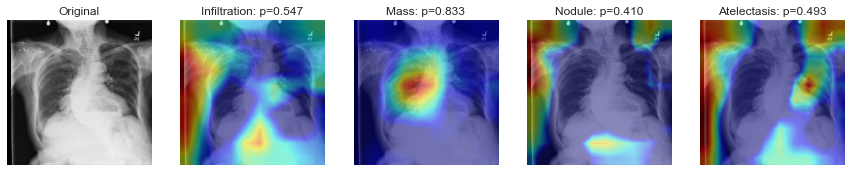

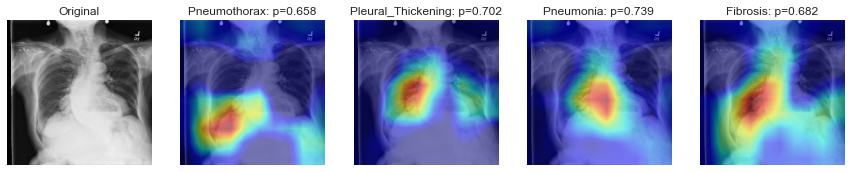

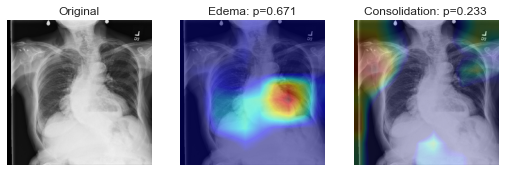

In [12]:
#Near Death
labels_to_show = labels[:4]
util.compute_gradcam(model, '00000284_005.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[4:8]
util.compute_gradcam(model, '00000284_005.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[8:12]
util.compute_gradcam(model, '00000284_005.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[12:]
util.compute_gradcam(model, '00000284_005.png', IMAGE_DIR, df, labels, labels_to_show)

Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Effusion
Generating gradcam for class Hernia
Loading original image
Generating gradcam for class Infiltration
Generating gradcam for class Mass
Generating gradcam for class Nodule
Generating gradcam for class Atelectasis
Loading original image
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Fibrosis
Loading original image
Generating gradcam for class Edema
Generating gradcam for class Consolidation


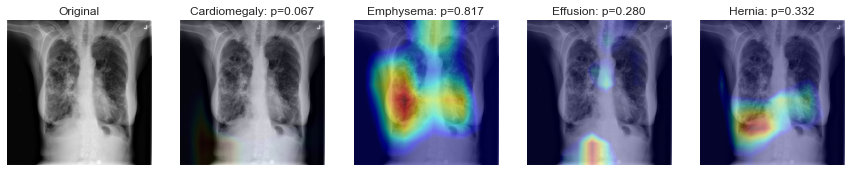

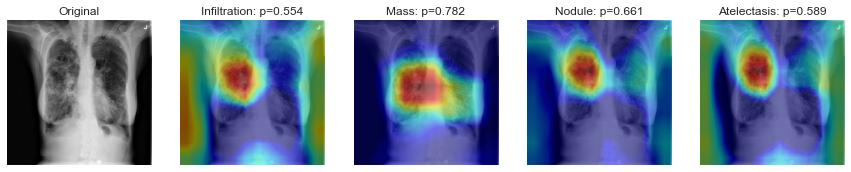

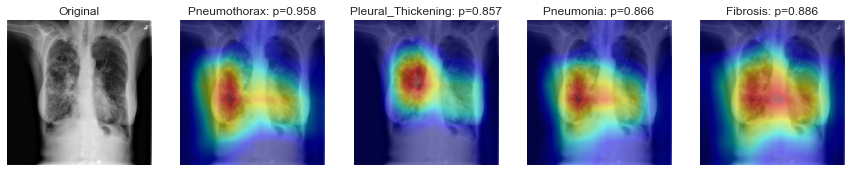

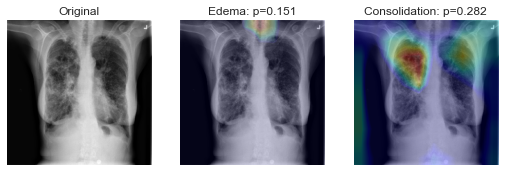

In [24]:
labels_to_show = labels[:4]
util.compute_gradcam(model, '00004735_008.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[4:8]
util.compute_gradcam(model, '00004735_008.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[8:12]
util.compute_gradcam(model, '00004735_008.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[12:]
util.compute_gradcam(model, '00004735_008.png', IMAGE_DIR, df, labels, labels_to_show)

Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Emphysema
Generating gradcam for class Effusion
Generating gradcam for class Hernia
Loading original image
Generating gradcam for class Infiltration
Generating gradcam for class Mass
Generating gradcam for class Nodule
Generating gradcam for class Atelectasis
Loading original image
Generating gradcam for class Pneumothorax
Generating gradcam for class Pleural_Thickening
Generating gradcam for class Pneumonia
Generating gradcam for class Fibrosis
Loading original image
Generating gradcam for class Edema
Generating gradcam for class Consolidation


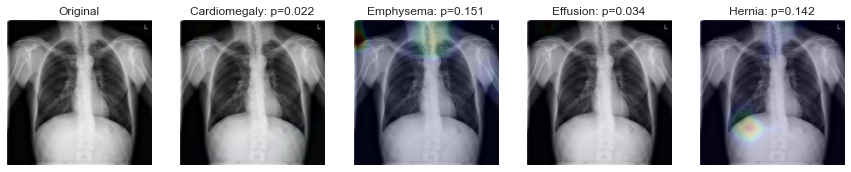

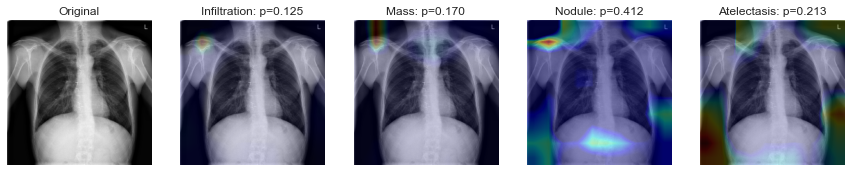

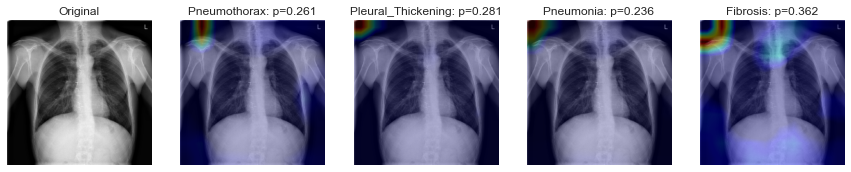

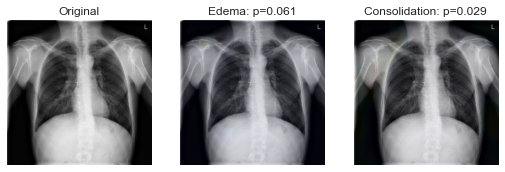

In [13]:
#Normal X-Ray
labels_to_show = labels[:4]
util.compute_gradcam(model, '00000020_001.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[4:8]
util.compute_gradcam(model, '00000020_001.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[8:12]
util.compute_gradcam(model, '00000020_001.png', IMAGE_DIR, df, labels, labels_to_show)
labels_to_show =labels[12:]
util.compute_gradcam(model, '00000020_001.png', IMAGE_DIR, df, labels, labels_to_show)